# Module 7: Machine Learning

## Author Jason A. Ballard  

## [JBtallgrass GitHub Repo](https://github.com/JBtallgrass/datafun-07-ml)

In [178]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1: Chart a straight line

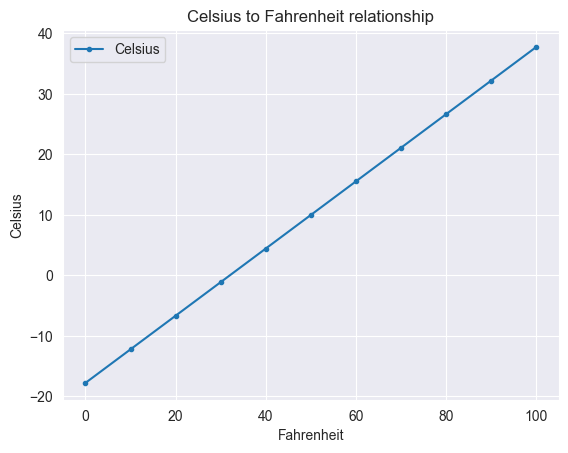

In [179]:
c =lambda f: 5/9 *(f-32)

temps =[(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit' , 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y = 'Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Save the figure
plt.title(f'Celsius to Fahrenheit relationship')
plt.savefig('figures/temp_line_chart.png')  # Saves to the file as .png to figures directory
# Show all plots
plt.show()


## Part 2: Predict Avg High Temp in NYC in January

### Section 1: Data Acquisition

In [180]:
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2: Data Inspection

In [181]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [182]:
nyc_df.columns =['Date', 'Temperature', 'Anomaly']
nyc_df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [183]:
nyc_df.Date.dtype

dtype('int64')

In [184]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Descriptive Statistics

In [185]:
pd.set_option('display.precision',2)

nyc_df.Temperature.describe()



count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Build the Model

In [186]:
linear_regression =stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope


0.01477136113296616

In [187]:
linear_regression.intercept

8.694993233674293

### Section 6: Predict

In [188]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7: Data Visualization

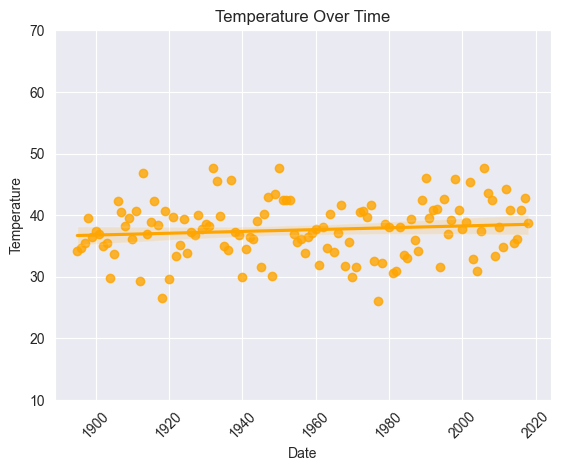

In [189]:
# Set the style to 'darkgrid'
sns.set_style('darkgrid')

# Create the regression plot
axes = sns.regplot(x='Date', y='Temperature', data=nyc_df, color='orange')
axes.set_ylim(10, 70)

# Add title and labels for clarity
axes.set_title('Temperature Over Time')
axes.set_xlabel('Date')
axes.set_ylabel('Temperature')

# Optionally, if you have a lot of dates on the x-axis and they overlap
plt.xticks(rotation=45)

# Save the figure
plt.savefig('figures/regression_plot.png', dpi=300)  # Adjust dpi for higher resolution if needed

# Display the plot
plt.show()

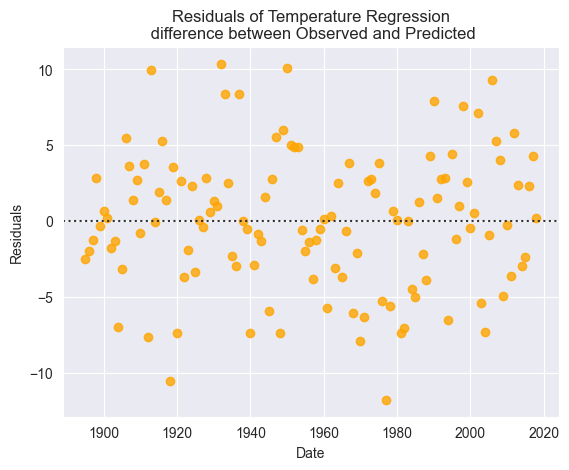

In [190]:
# Create a residual plot to show differences between observed and predicted temperatures
sns.residplot(x='Date', y='Temperature', data=nyc_df, color='orange')

plt.title('Residuals of Temperature Regression\n difference between Observed and Predicted')
plt.xlabel('Date')
plt.ylabel('Residuals')

# Save the residual plot
plt.savefig('figures/temperature_residuals.png', dpi=300)

plt.show()


## Part 3: Predict the Average High Temperature in January in NYC

### Section 1: Build the Model (Split training and testing)

In [192]:
X_train, X_test, y_train, y_test =train_test_split(nyc_df.Date.values.reshape(-1,1),nyc_df.Temperature.values, random_state=11)

X_train.shape

X_test.shape



(31, 1)

In [196]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [194]:
linear_regression.coef_

array([0.01939167])

In [195]:
linear_regression.intercept_

-0.30779820252656975

### Section 2: Test the Model

In [ ]:
predicted = linear_regression.predict(X_test)

expected = y_test 

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

### Section 3: Predict 

### Section 4: Data Visualizations